<a href="https://colab.research.google.com/github/lhoegler16/Biersortenerkennung/blob/main/Biersortenerkennung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biersortenerkennung

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
!pip install -U fastai
from fastai.vision.all import*

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.0)


In [ ]:
#download from qdrive

!cp drive/MyDrive/Biersortenerkenner/Biersortenerkenner.tar.gz ./
!mkdir /content/images
!tar -xf /content/Biersortenerkenner.tar.gz -C /content/images/

In [77]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [78]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [79]:
beer_dataloader = beers.dataloaders(path)

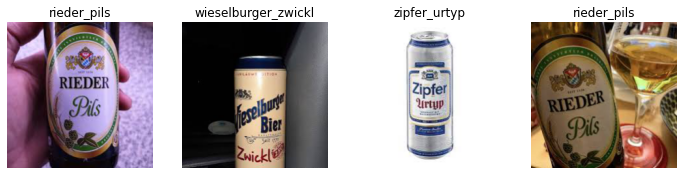

In [54]:
beer_dataloader.show_batch(max_n = 4, nrows= 1)

In [80]:
learner = cnn_learner(beer_dataloader,resnet18,metrics=error_rate)

In [82]:
learner.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.036988,3.259426,0.898734,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.456919,3.104077,0.873418,00:01
1,2.469499,2.961964,0.810127,00:01
2,2.249193,2.791074,0.784810,00:01
3,1.974234,2.648665,0.772152,00:01
4,1.729821,2.556141,0.784810,00:01
5,1.529325,2.524410,0.797468,00:01
6,1.357357,2.527083,0.810127,00:01
7,1.232033,2.515517,0.784810,00:01
8,1.134618,2.496161,0.797468,00:01
9,1.034009,2.501550,0.784810,00:01


In [ ]:
learner.export('biersorten_classifier.pkl')

In [ ]:
#copy learner on gdrive
!cp /content/biersorten_classifier.pkl /content/drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl

In [45]:
#copy exported learner from gdrive

!cp drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl ./

cp: cannot stat 'drive/MyDrive/Biersortenerkenner/models/biersorten_classifier.pkl': No such file or directory


In [89]:
path = Path();

inference = load_learner(path/'biersorten_classifier.pkl')

In [34]:
inference.predict('zipfer_maerzen_19.jpg')

('zipfer_maerzen',
 tensor(18),
 tensor([1.1063e-10, 9.3545e-14, 1.1275e-12, 7.7962e-12, 5.2037e-12, 3.8059e-12,
         1.6093e-10, 1.1457e-09, 6.8382e-12, 1.6371e-11, 2.8801e-09, 5.4639e-12,
         2.6451e-12, 4.2447e-11, 1.4866e-12, 6.2051e-12, 5.2494e-13, 1.2080e-10,
         1.0000e+00, 1.0114e-09, 1.0266e-11]))